# Visualization of Mutli Dimesnional Data in Python


For illustration purposes here I use the Wine Quality Data Set available from the UCI Machine Learning Repository (also uploaded here at the repo). Dataset consists of two similar subsets of various attributes of red and white wine. 

In [130]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
warnings.filterwarnings('ignore')

### Loading and analyzing data
After loading the data before visualization, I __merge__ the two subsets of data for red and white wines. Also I create a categorical new variable named as __quality_label__ from the quality attribute of wines.

In [220]:
white_wine = pd.read_csv('Dataset/winequality-white.csv', sep=';')
red_wine = pd.read_csv('Dataset/winequality-red.csv', sep=';')

# store wine type as an attribute
white_wine['wine type'] = 'white'
red_wine['wine type'] = 'red'   


# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply\
                            (lambda value: 'low' if value <= 5 else 'medium'if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply\
                            (lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# shuffle the data to randomize data points
wines = wines.sample(frac=1, random_state=1).reset_index(drop=True)

wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.6              0.32         0.58           16.75      0.050   
1            5.7              0.24         0.47            6.30      0.069   
2            7.6              0.36         0.44            8.30      0.255   
3            7.4              0.47         0.46            2.20      0.114   
4            9.9              0.49         0.23            2.40      0.087   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 43.0                 163.0  0.99990  3.15       0.54   
1                 35.0                 182.0  0.99391  3.11       0.46   
2                 28.0                 142.0  0.99580  3.12       0.43   
3                  7.0                  20.0  0.99647  3.32       0.63   
4                 19.0                 115.0  0.99480  2.77       0.44   

     alcohol  quality wine type quality_label  
0   9.200000        5     white           low  
1   9.733333        5     white           low  
2  10.200000        6     white        medium  
3  10.500000        5       red           low  
4   9.400000        6     white        medium

### Descriptive summary statistics of data

In [3]:
subset_of_attributes = ['residual sugar', 'alcohol', 'quality']

rw = round(red_wine[subset_of_attributes].describe(),1)
ww = round(white_wine[subset_of_attributes].describe(),1)

pd.concat([rw, ww], axis=0, keys=['Red-Wine Statistics', 'White-Wine Statistics'])


residual sugar  alcohol  quality
Red-Wine Statistics   count          1599.0   1599.0   1599.0
                      mean              2.5     10.4      5.6
                      std               1.4      1.1      0.8
                      min               0.9      8.4      3.0
                      25%               1.9      9.5      5.0
                      50%               2.2     10.2      6.0
                      75%               2.6     11.1      6.0
                      max              15.5     14.9      8.0
White-Wine Statistics count          4898.0   4898.0   4898.0
                      mean              6.4     10.5      5.9
                      std               5.1      1.2      0.9
                      min               0.6      8.0      3.0
                      25%               1.7      9.5      5.0
                      50%               5.2     10.4      6.0
                      75%               9.9     11.4      6.0
                      max              65.8     14.2      9.0

# 1. Univariate Analysis (1D)
In __univariate analysis__ we analyze one data attribute or variable and visualize it i.e. one dimension.

### histograms 

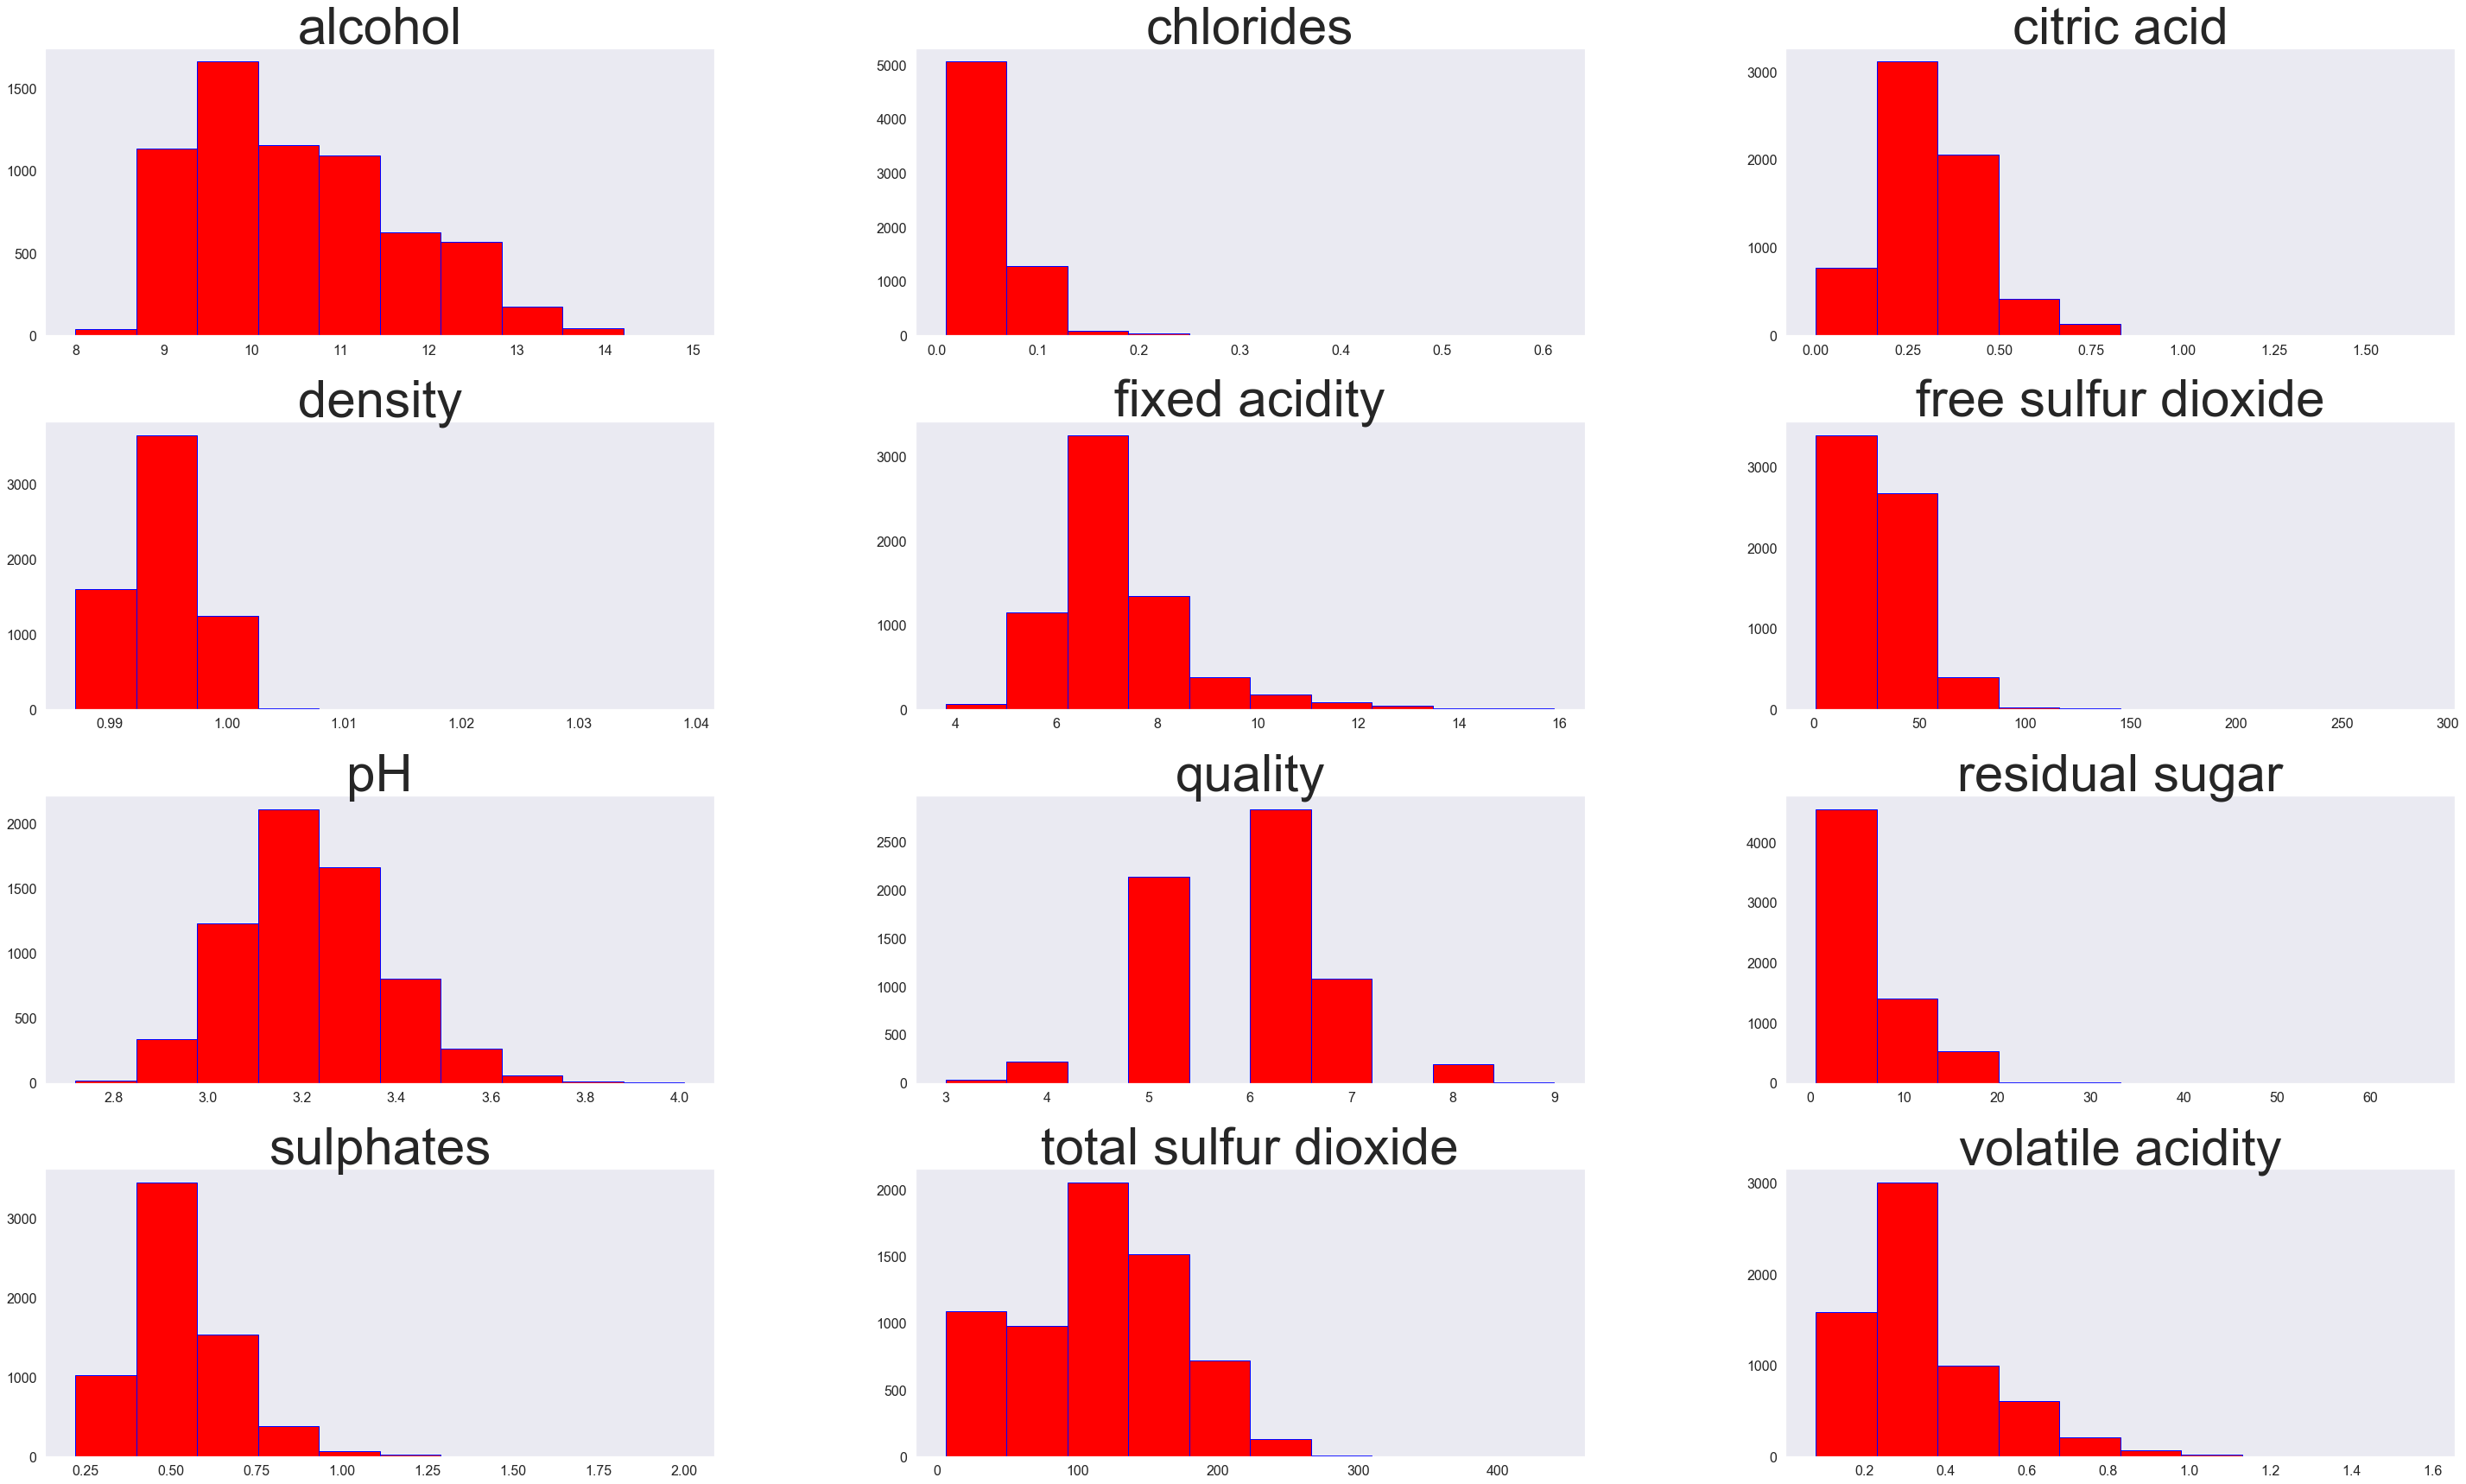

In [83]:
params = {'axes.titlesize':'60',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
mpl.rcParams.update(params);
a = wines.hist(figsize=(50, 30), bins=10, color='red', edgecolor='blue', linewidth=1.0, xlabelsize=16, ylabelsize=16, grid=False)    


### Visualizing one of the continuous, numeric parameters
__Histogram plot__ and __Density Plot__

Here we want to see how the data is distributed for one attribute:

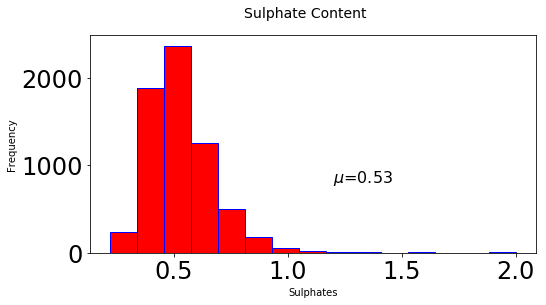

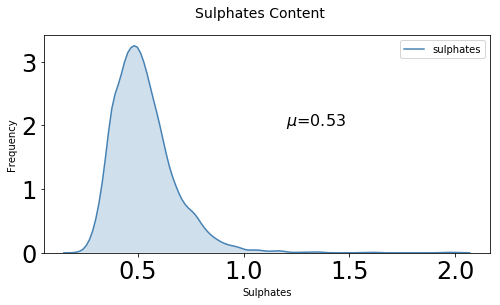

In [27]:
# Histogram plot
fig = plt.figure(figsize = (8,4))
title = fig.suptitle("Sulphate Content", fontsize=14)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), fontsize=16)
freq, bins, patches = ax.hist(wines['sulphates'], color='red', bins=15, edgecolor='blue', linewidth=1)
plt.show()  

# Density Plot
fig = plt.figure(figsize = (8, 4))
title = fig.suptitle("Sulphates Content", fontsize=14)
ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
ax1.text(1.2, 2, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), fontsize=16)
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')
plt.show()  

### Visualizing a discrete, categorical data attribute
__bar plot__

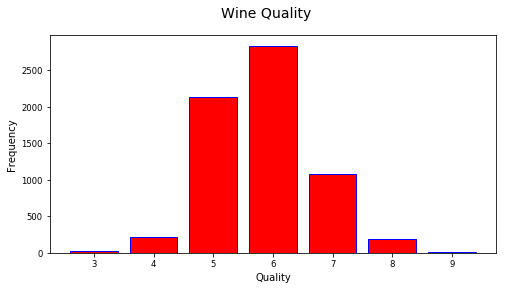

In [33]:
fig = plt.figure(figsize = (8, 4))
title = fig.suptitle("Wine Quality", fontsize=14)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='red', edgecolor='blue')

# 2.  Multivariate Analysis
Multivariate analysis helps to check distributions and also relationships, patterns and correlations in the dataset.


## Two Dimensions (2-D)
### Correlation heatmap
Heatmap for pair-wise correlation matrix can find out relationships and correlations. The gradients in the heatmap vary as the strength of the correlation.


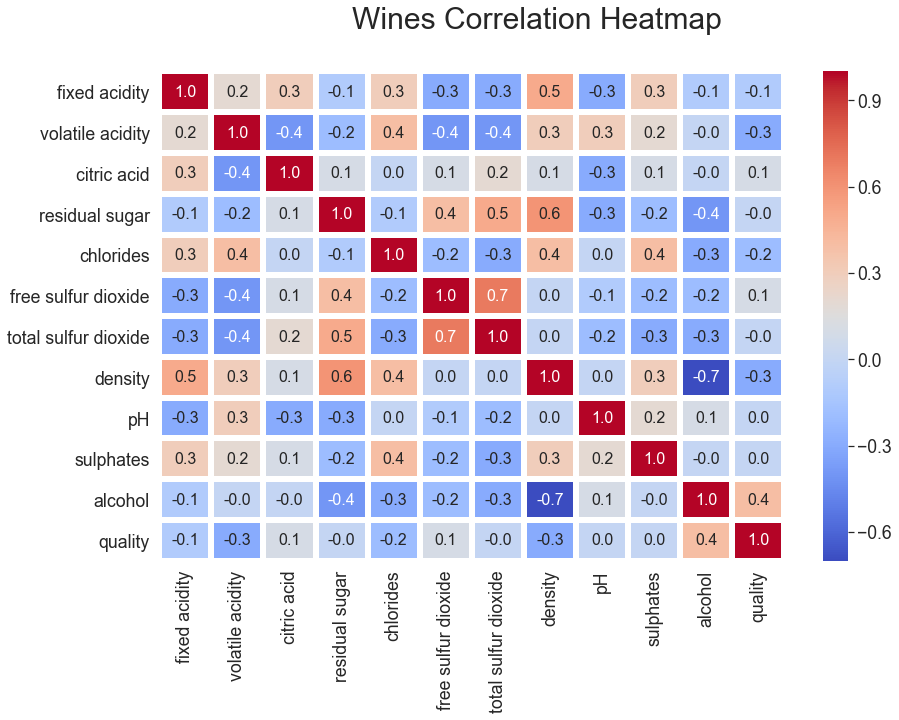

In [70]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(14, 9))
corr = wines.corr()
hm = sns.heatmap(round(corr,1), annot=True, ax=ax, cmap="coolwarm",fmt='.1f', linewidths=5, annot_kws={"size": 16})
sns.set(font_scale=1.6)
t= f.suptitle('Wines Correlation Heatmap', fontsize=30)

### Pair-wise scatter plots
Another way to visualize the correlations is to use pair-wise scatter plots of attributes of interest

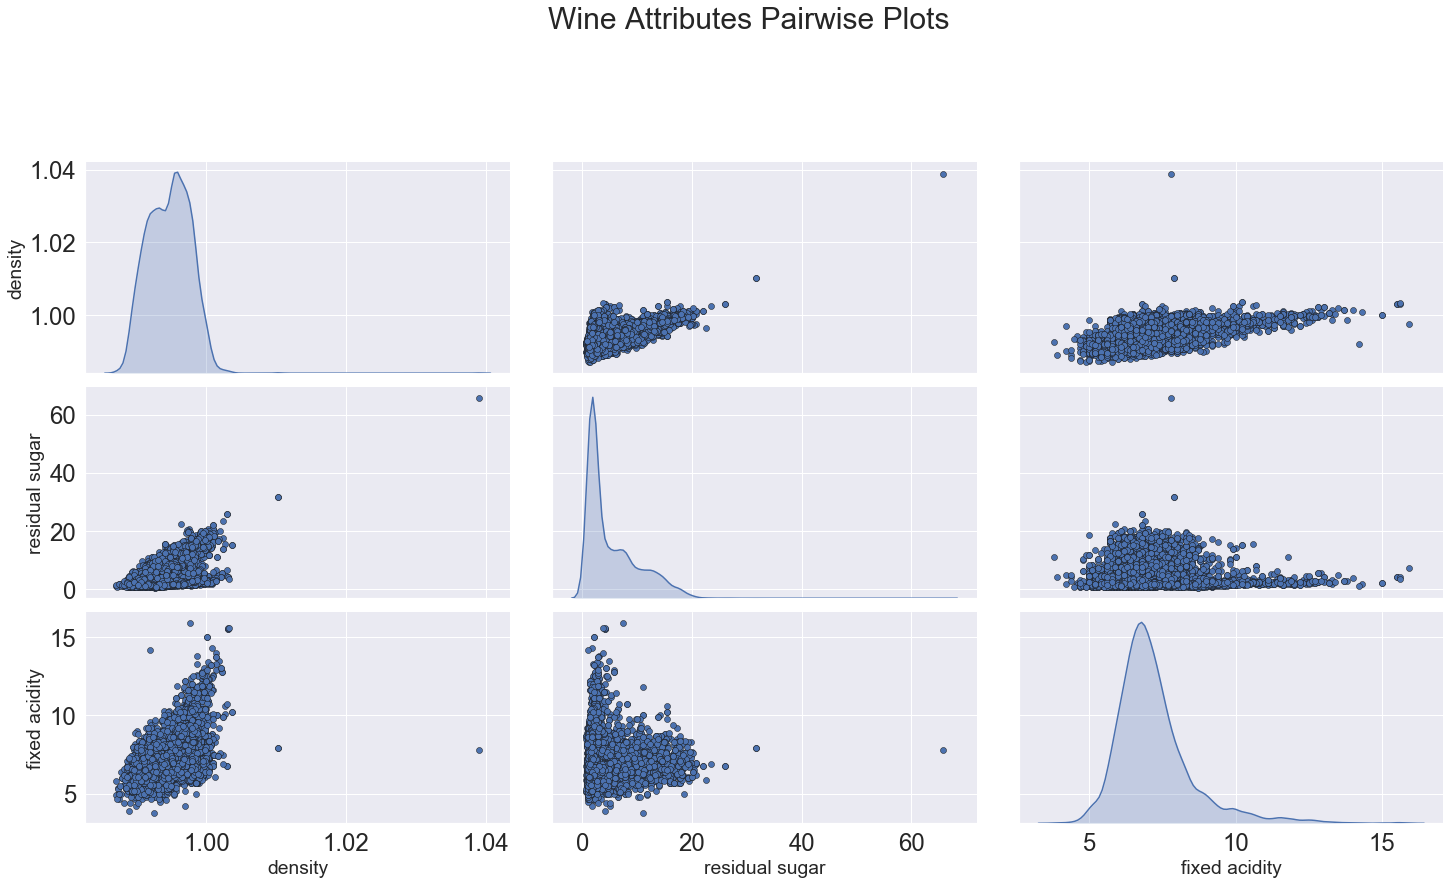

In [111]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'fixed acidity']
g = sns.pairplot(wines[cols], size=10, aspect=1,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

g.fig.set_figheight(12)
g.fig.set_figwidth(20)

fig = plt.gcf()
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=30)
fig.subplots_adjust(top=0.8, wspace=0.1)

### Parallel Coorindates
Another way of visualizing multivariate data for multiple attributes together is to use __parallel coordinates__.

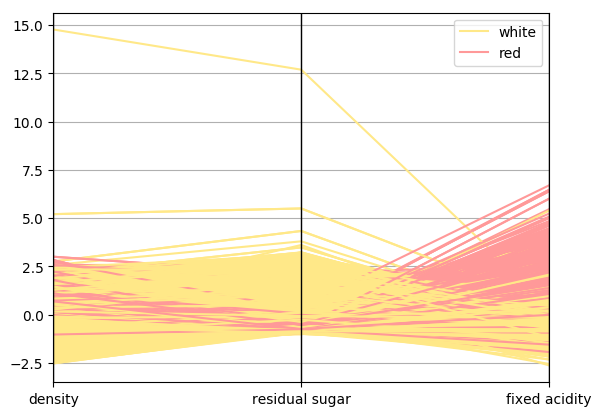

In [129]:
# Scaling attribute values to avoid few outiers
mpl.rcParams.update(mpl.rcParamsDefault)
cols = ['density', 'residual sugar', 'fixed acidity']
subset_df = wines[cols]
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine type']], axis=1)

# plot parallel coordinates
pc = parallel_coordinates(final_df, 'wine type', color=('#FFE888', '#FF9999'))

In above plot, points are represented as connected line segments and each vertical line represents one data attribute. One complete set of connected line segments across all the attributes represents one data point. We can see that density is slightly more for red wines as compared to white wines.



### Continuous, numeric attributes - Scatter Plot, Join Plot
Here I visualize continuous, numeric variables by scatter plots and joint plots to see not only patterns, relationships but also see the individual distributions for the attributes.

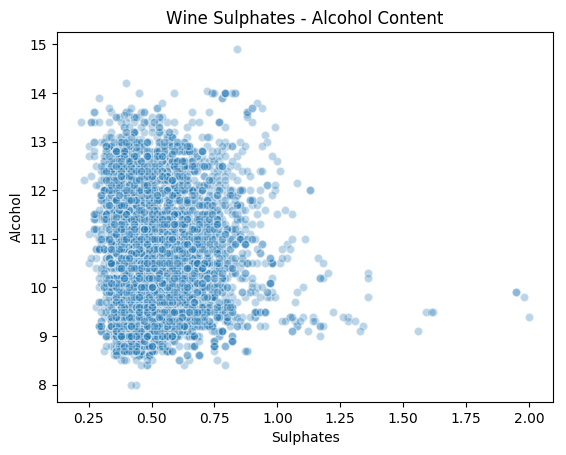

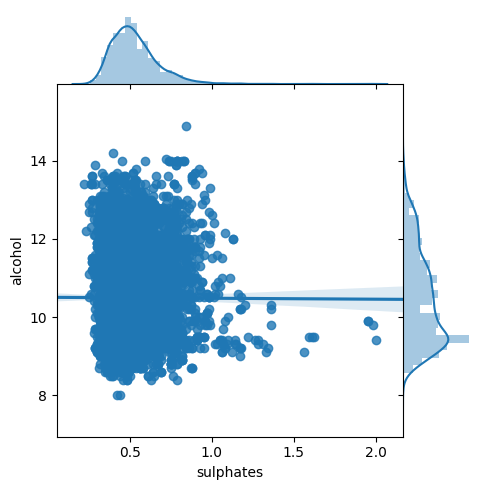

In [141]:
# Scatter Plot
plt.scatter(wines['sulphates'], wines['alcohol'], alpha=0.3, edgecolors='w')
plt.title('Wine Sulphates - Alcohol Content')
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')


# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines, kind='reg', space=0, size=5, ratio=5)

### Discrete, categorical attributes - bar plots subplots


<BarContainer object of 7 artists>

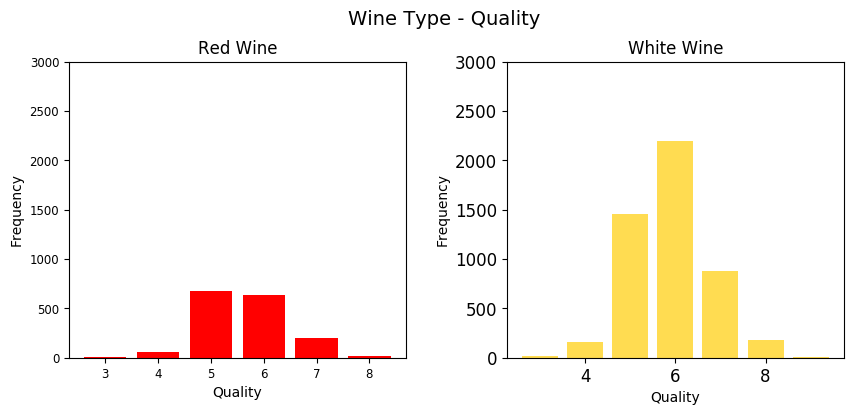

In [153]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 3000])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red')


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 3000])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.bar(ww_q[0], ww_q[1], color='#FFDC51')

### Stacked bars or multiple bars for the different attributes in a single plot

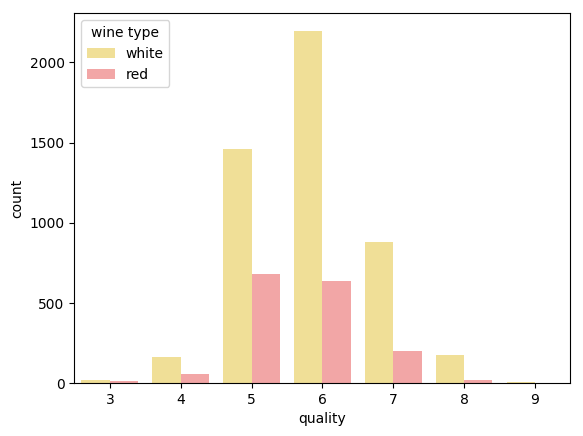

In [155]:
# Multi-bar Plot
cp = sns.countplot(x="quality", hue="wine type", data=wines, palette={"red": "#FF9999", "white": "#FFE888"})

### Mixed attributes (numeric and categorical ) in two-dimensions 

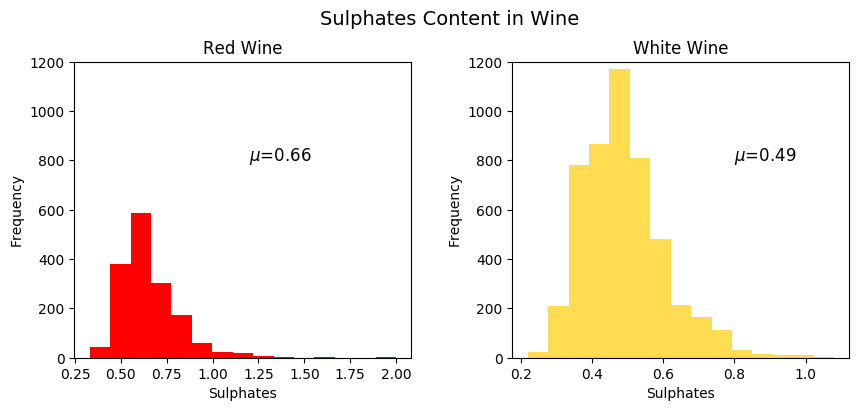

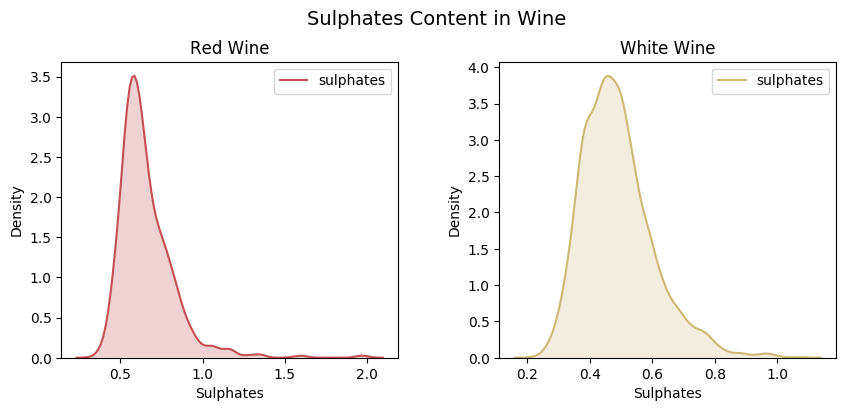

In [158]:
# facets with histograms
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15)
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='#FFDC51', bins=15)
                                     

# facets with density plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')



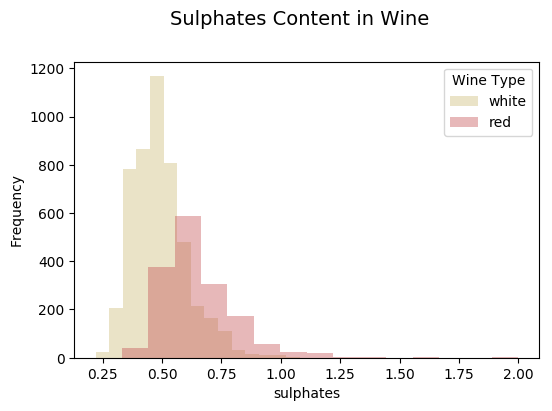

In [160]:
# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
g = sns.FacetGrid(wines, hue='wine type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

### Box Plots
Box plots are a good way to know the quartile values in the data and also potential outliers.

Text(0, 0.5, 'Wine Alcohol %')

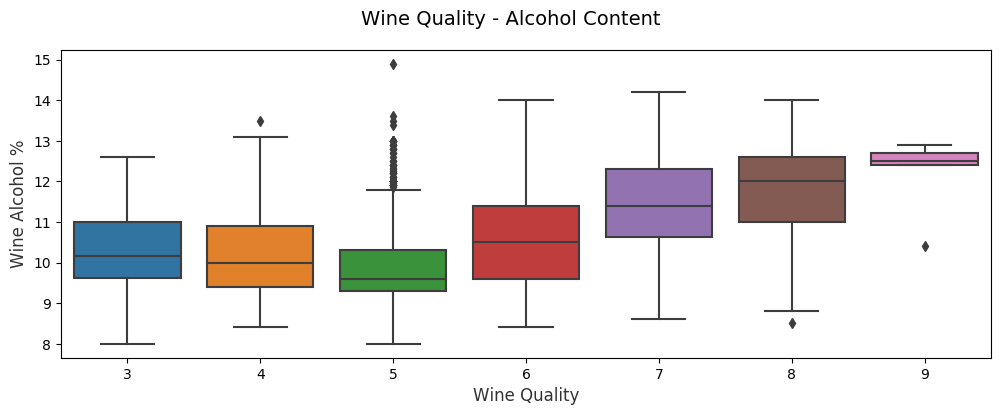

In [161]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines, ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

### Violin Plots
To visualize grouped numeric data using kernel density plots i.e. depicts probability density of the data at different values

Text(0, 0.5, 'Wine Sulphates')

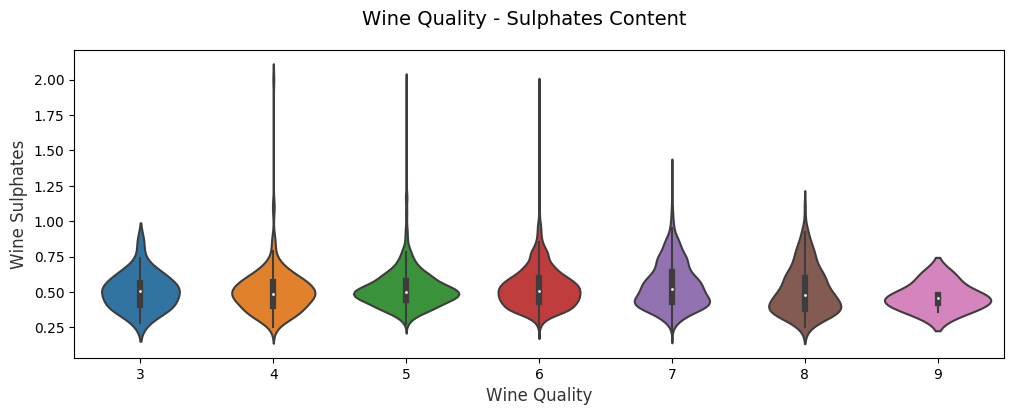

In [162]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines, ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

### Visualizing data in Three Dimensions (3-D)

We can visualize them by considering a pair-wise scatter plot and introducing a color or hue to separate out values in a categorical dimension.

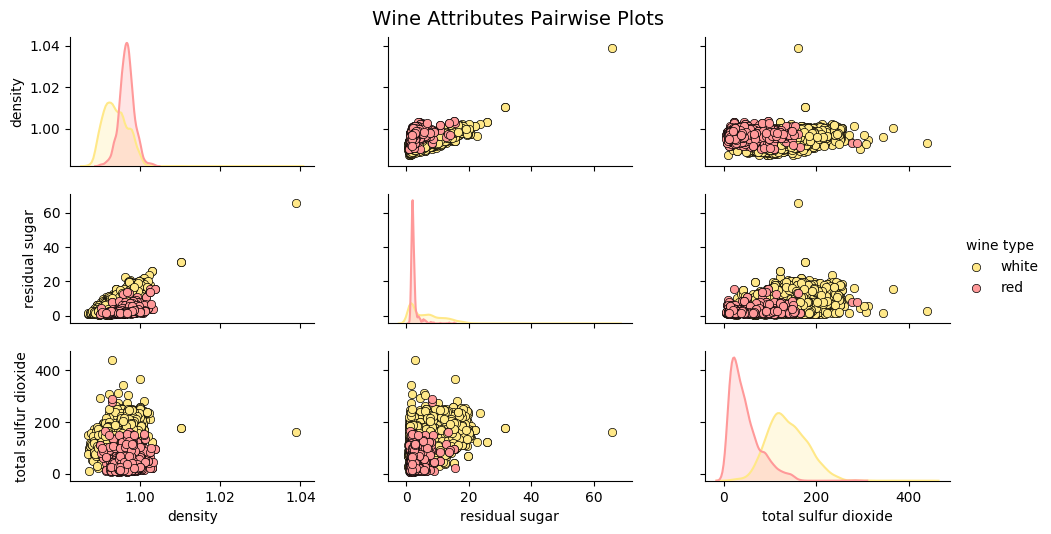

In [166]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'wine type']
pp = sns.pairplot(wines[cols], hue='wine type', size=1.8, aspect=1.8, palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

__3 Continuous Numeric Attributes__

Have two dimensions represented as the regular length (x-axis)and breadth (y-axis) and also take the depth (z-axis) for the third dimension.



Text(0.5, 0, 'Alcohol')

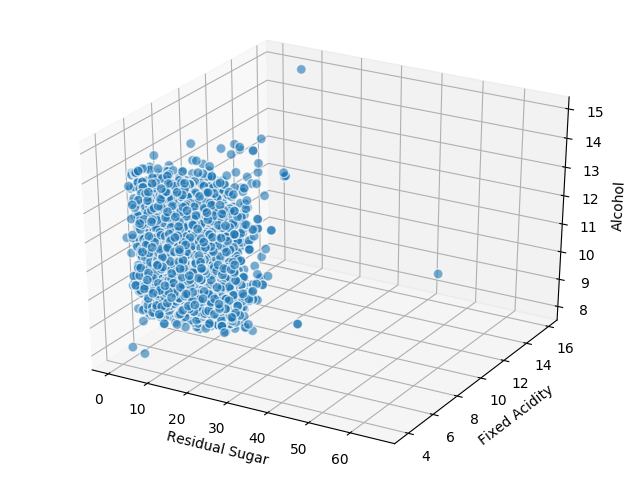

In [167]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

__Binning__

We can plot on 2-D axes for representing two continuous variables (scatter plot) and introduce the third continuous variable as a categorical variable by binning its values in fixed width bins — popularly these can be quantiles.

Based on these quantiles (or bins) we can use size or even hue to represent the third variable here making it 3-D.

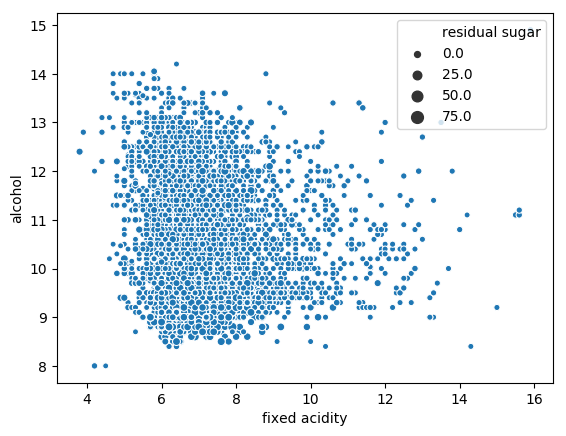

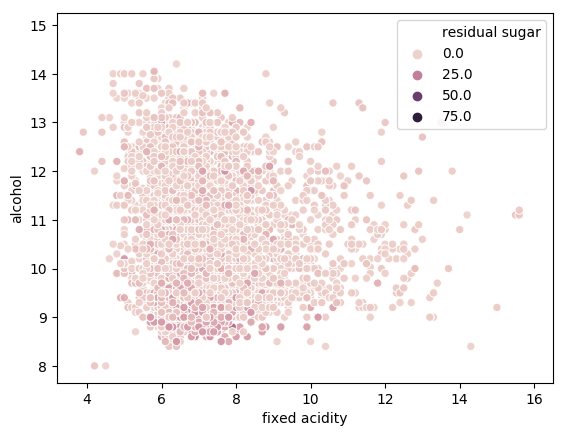

In [168]:
# using size for the 3rd dimension
sc = sns.scatterplot(wines['fixed acidity'], wines['alcohol'], size=wines['residual sugar'])
plt.show()
# using color for the 3rd dimension
sc = sns.scatterplot(wines['fixed acidity'], wines['alcohol'], hue=wines['residual sugar'], alpha=0.9)

A better option would be to use the notion of __faceting as the third dimension__ (essentially subplots) where each subplot indicates a specific bin from our third variable (dimension). 

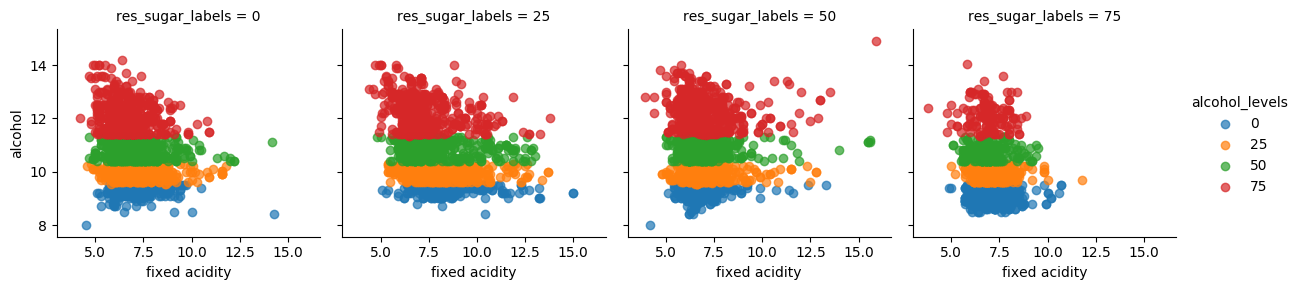

In [169]:
# example depicting representing 3-D continous data
# using color and facets
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0', '25', '50', '75']
wines['res_sugar_labels'] = pd.qcut(wines['residual sugar'], q=quantile_list, labels=quantile_labels)
wines['alcohol_levels'] = pd.qcut(wines['alcohol'], q=quantile_list, labels=quantile_labels)
g = sns.FacetGrid(wines, col="res_sugar_labels", hue='alcohol_levels')
g.map(plt.scatter, "fixed acidity", "alcohol", alpha=.7)
g.add_legend();

The above plot tells us that higher the residual_sugar levels and the alcohol content, lower is the fixed_acidity in the wine samples

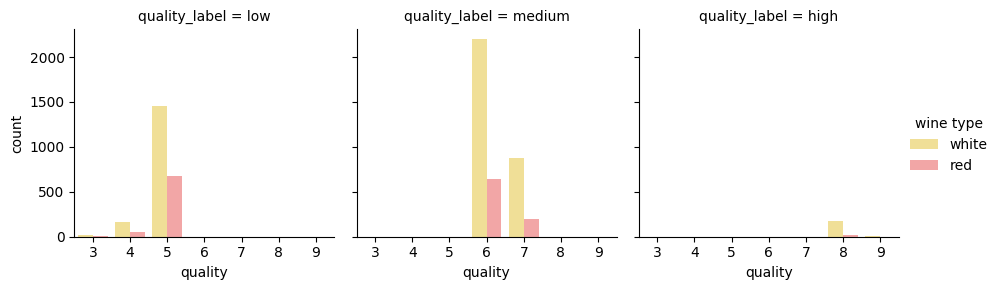

In [186]:
# Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets
mpl.rcParams.update(mpl.rcParamsDefault)
fc = sns.factorplot(x="quality", hue="wine type", col="quality_label", data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"}, size=3, aspect=1)

We use the notion of __hue for separating groups__ in one of the categorical attributes while using conventional visualizations like scatter plots for visualizing two dimensions for numeric attributes.

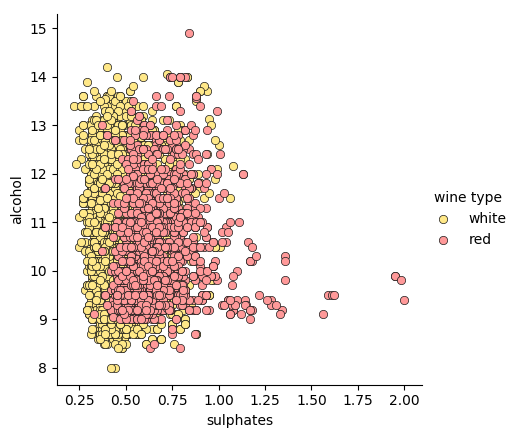

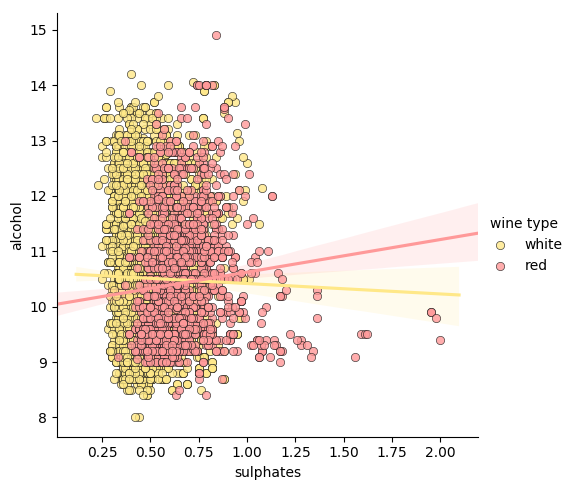

In [188]:
# Visualizing 3-D mix data using scatter plots
# leveraging the concepts of hue for categorical dimension
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5, hue="wine type", 
                  palette={"red": "#FF9999", "white": "#FFE888"}, plot_kws=dict(edgecolor="k", linewidth=0.5))
                  
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine type', palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True, scatter_kws=dict(edgecolor="k", linewidth=0.5))  

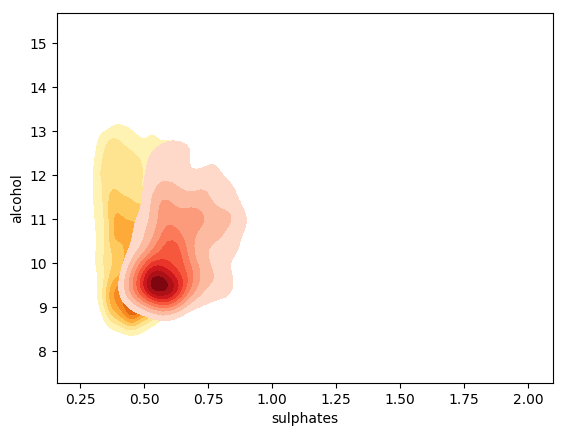

In [189]:
# Visualizing 3-D mix data using kernel density plots
# leveraging the concepts of hue for categorical dimension
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'], cmap="YlOrBr", shade=True, shade_lowest=False)

ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'], cmap="Reds", shade=True, shade_lowest=False)

__More than one categorical variable__ - Using Hue

In case we are dealing with more than one categorical attribute in the three dimensions, we can use hue and one of the regular axes for visualizing data and use visualizations like box plots or violin plots to visualize the different groups of data.



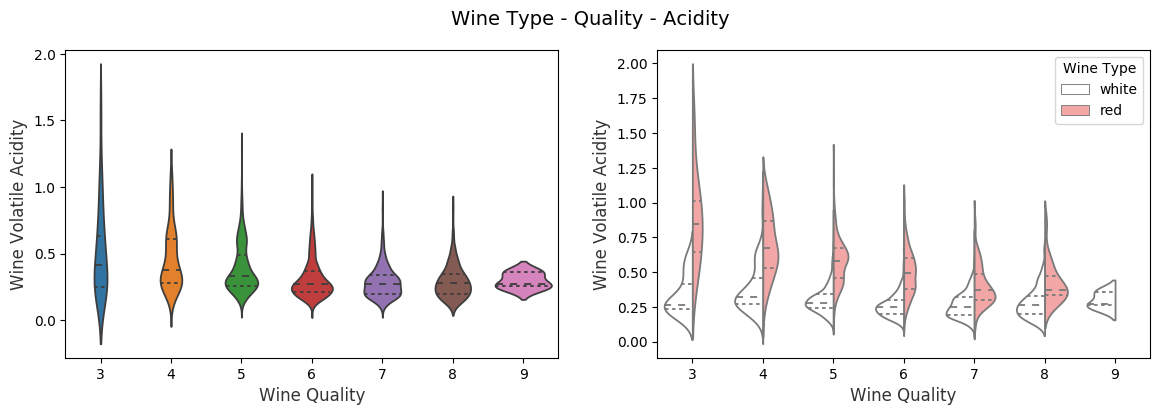

In [191]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity", data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine type", data=wines, split=True, 
               inner="quart", linewidth=1.3, palette={"red": "#FF9999", "white": "white"}, ax=ax2)

ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

In the figure above, we can see that in the 3-D visualization on the right hand plot, we have represented wine quality on the x-axis and wine_type as the hue. We can clearly see some interesting insights like volatile acidity is higher for red wines as compared to white wines.

__More than one categorical variable__ - Using box plot

You can also consider using box plots for representing mixed attributes with more than one categorical variable in a similar way.

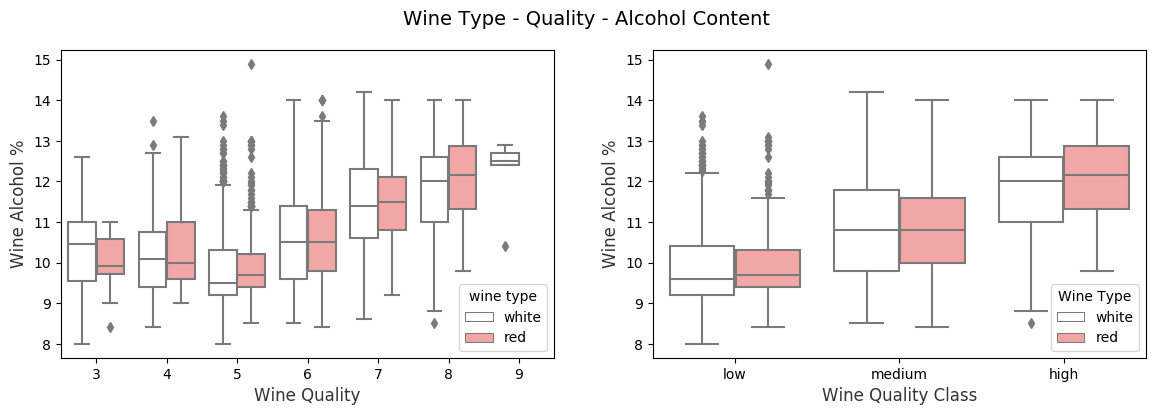

In [193]:
# Visualizing 3-D mix data using box plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine type", data=wines, 
            palette={"red": "#FF9999", "white": "white"}, ax=ax1)

ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)

ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

We can see that both for quality and quality_label attributes, the wine alcohol content increases with better quality. Also red wines tend to have a sightly higher median alcohol content as compared to white wines based on the quality class. However if we check the quality ratings, we can see that for lower rated wines (3 & 4), the white wine median alcohol content is greater than red wine samples. Otherwise red wines seem to have a slightly higher median alcohol content in general as compared to white wines.


### Visualizing data in Four Dimensions (4-D)

One way to visualize data in 4 dimensions is to use __depth__ and __hue__ as specific data dimensions in a conventional plot like a scatter plot.

Text(0.5, 0, 'Fixed Acidity')

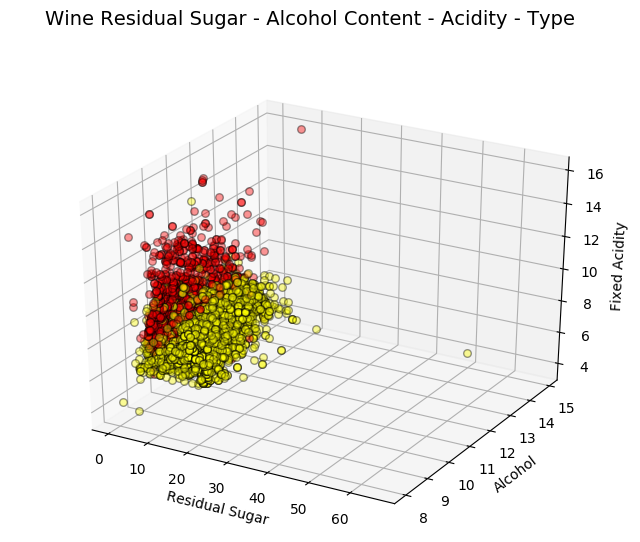

In [197]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and depth
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

The wine_type attribute is denoted by the hue which is quite evident from the above plot. Also, while interpreting these visualizations start getting difficult due to the complex nature of the plots, you can still gather insights like fixed acidity is higher for red wines and residual sugar is higher for white wines. Of course if there were some association between alcohol and fixed acidity we might have seen a gradually increasing or decreasing plane of data points showing some trend.


Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type')

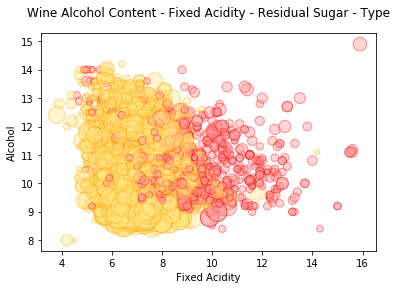

In [51]:
# Visualizing 4-D mix data using bubble plots
# leveraging the concepts of hue and size
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

We use hue to represent wine_type and the data point size to represent residual sugar. We do see similar patterns from what we observed in the previous chart and bubble sizes are larger for white wine in general indicate residual sugar values are higher for white wine as compared to red.

Now we use facets instead as below

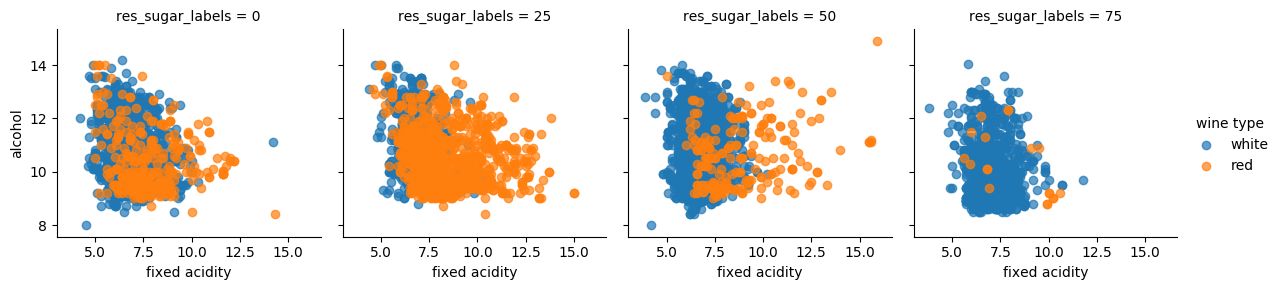

In [199]:
g = sns.FacetGrid(wines, col="res_sugar_labels",hue='wine type')
g.map(plt.scatter, "fixed acidity", "alcohol", alpha=.7)
g.add_legend();

Now we can reuse our concept of leveraging hue and facets to depict these attributes and regular plots like scatter plots to represent the numeric attributes

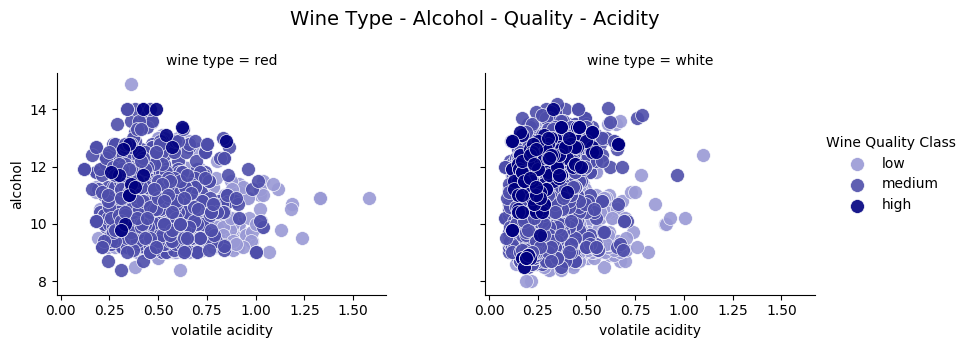

In [204]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(wines, col="wine type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, edgecolor='white', linewidth=0.5, s=100)

fig = plt.gcf()
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

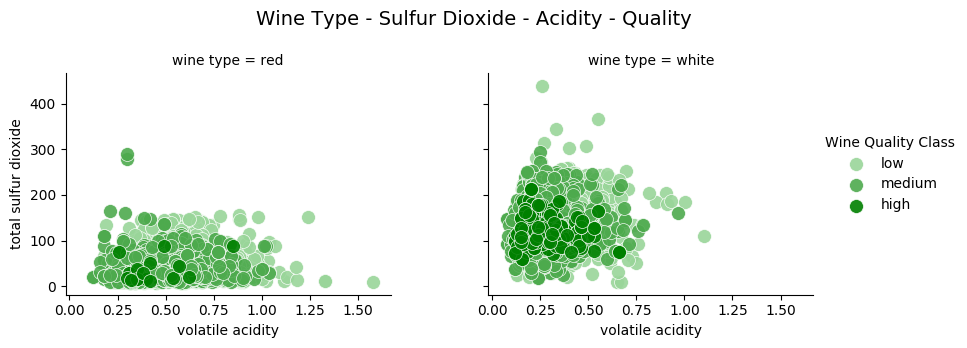

In [209]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(wines, col="wine type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 4)[1:])
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, edgecolor='white', linewidth=0.5, s=100)
fig = plt.gcf()
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

### Visualizing data in Five Dimensions (5-D)
We leverage various plotting components. Let’s use depth, hue and size to represent three of the data dimensions besides regular axes representing the other two dimensions. Since we use the notion of size, we will be basically plotting a three dimensional bubble chart.



Text(0.5, 0, 'Fixed Acidity')

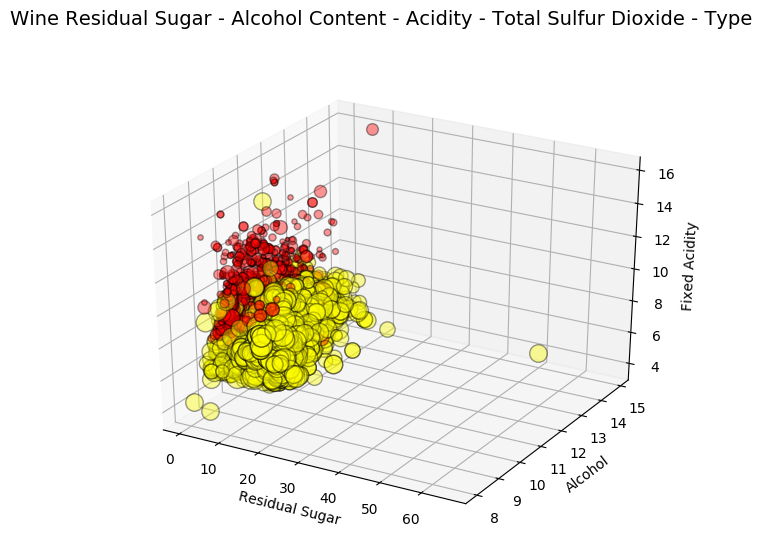

In [211]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

We can also use facets along with hue to represent more than one categorical attribute in these five data dimensions. One of the attributes representing size can be numerical (continuous) or even categorical (but we might need to represent it with numbers for data point sizes). 

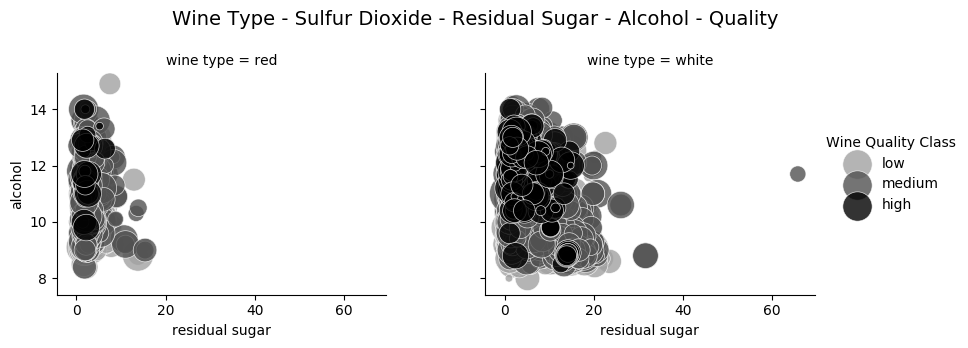

In [213]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and facets
g = sns.FacetGrid(wines, col="wine type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = plt.gcf()
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

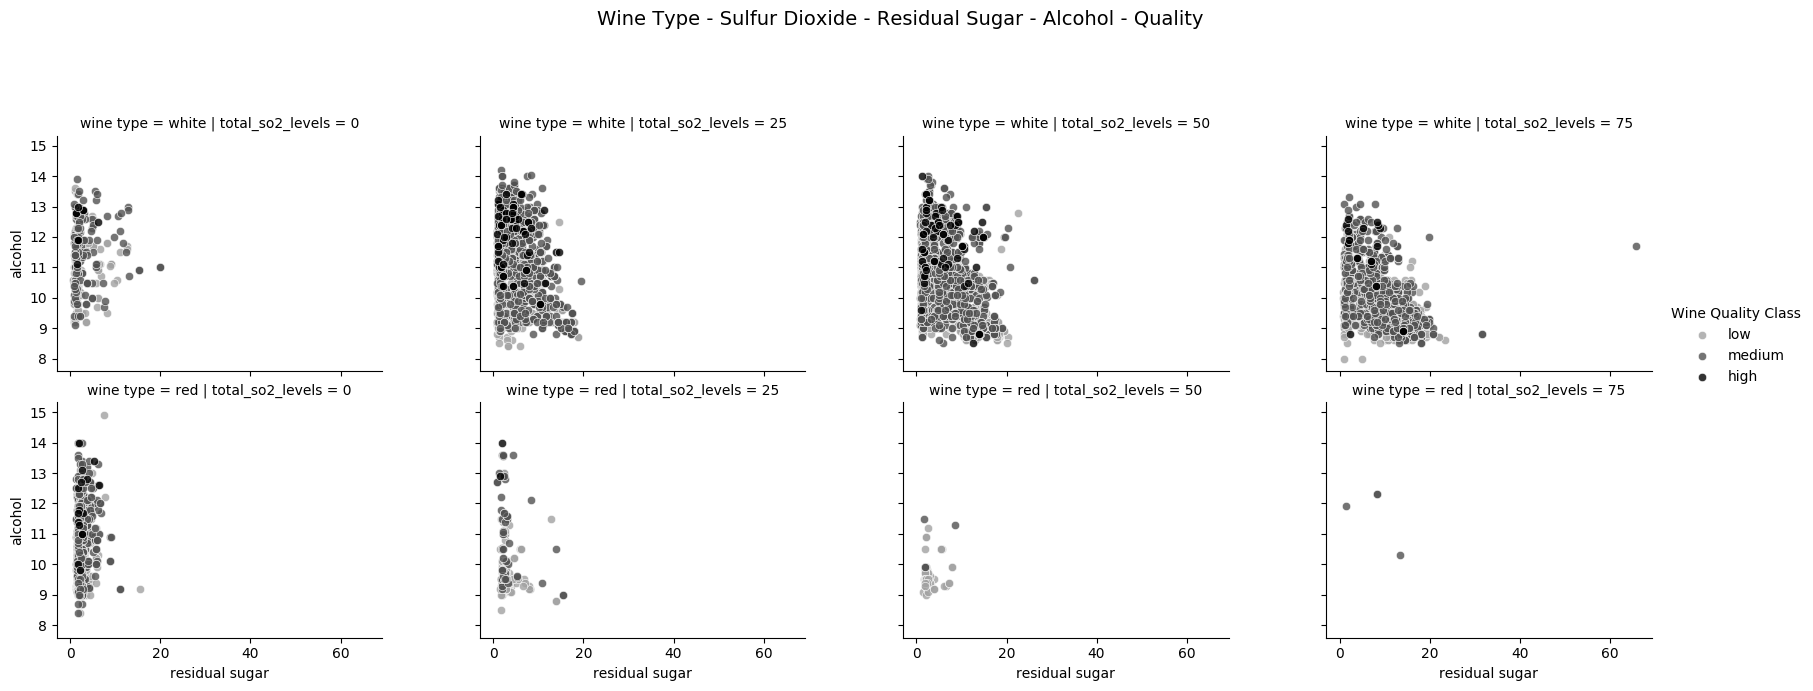

In [216]:
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0', '25', '50', '75']
wines['total_so2_levels'] = pd.qcut(wines['total sulfur dioxide'], 
                                    q=quantile_list, labels=quantile_labels)
g = sns.FacetGrid(wines, row="wine type", col='total_so2_levels', hue='quality_label', 
                  hue_order=['low', 'medium', 'high'], palette=sns.light_palette('black', 4)[1:],
                  aspect=1.2, size=3.5)
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, edgecolor='white', linewidth=0.5)
fig = plt.gcf()
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

While the additional dimension of depth or size might confuse many when looking at the plot we plotted previously, this plot due to the advantage of facets, still remains effectively on the 2-D plane and hence is often more effective and easy to interpret.

### Visualizing data in Six Dimensions (6-D)

Text(0.5, 0, 'Fixed Acidity')

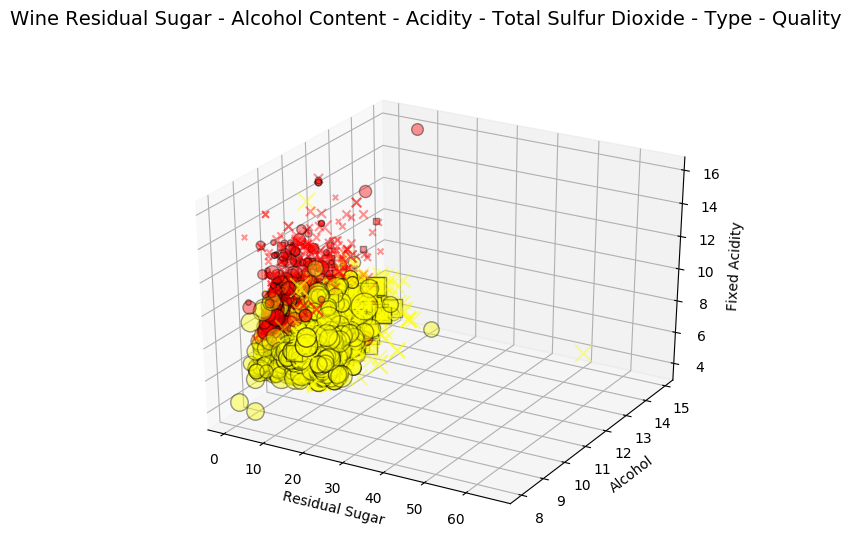

In [218]:
# Visualizing 6-D mix data using scatter charts
# leveraging the concepts of hue, size, depth and shape
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

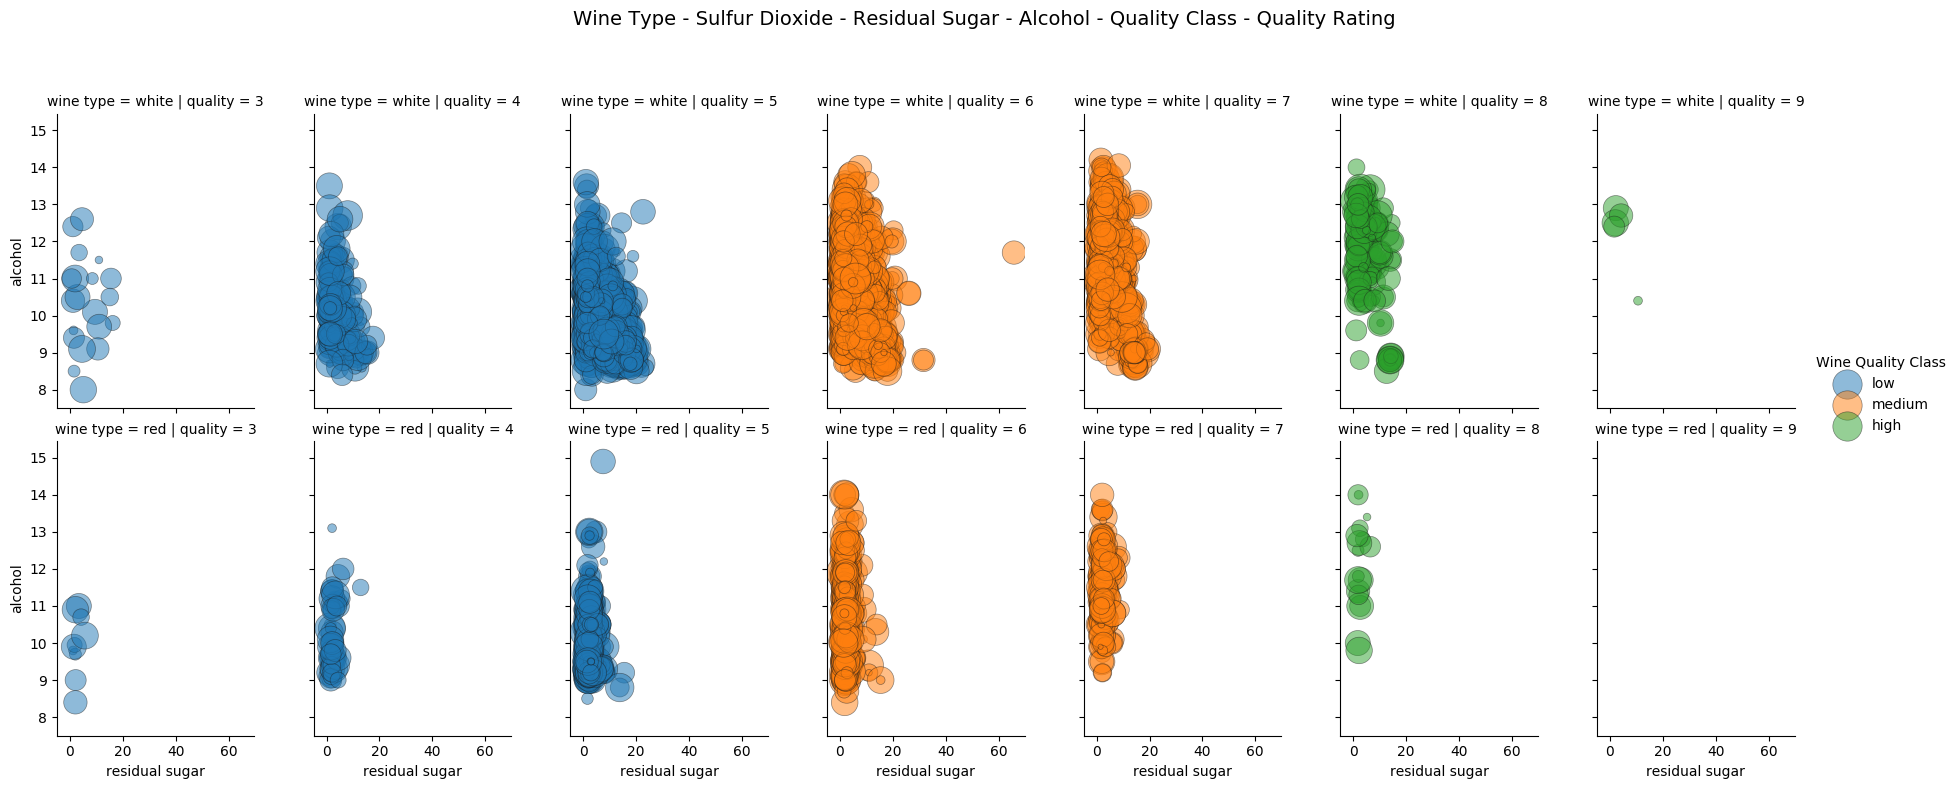

In [219]:
# Visualizing 6-D mix data using scatter charts
# leveraging the concepts of hue, facets and size
g = sns.FacetGrid(wines, row='wine type', col="quality", hue='quality_label', size=4)
g.map(plt.scatter,  "residual sugar", "alcohol", alpha=0.5, 
      edgecolor='k', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')